<h1>OKCupid Project</h1>


<h1>Introduction</h1>

This is a study to help my understanding of machine learning techniques. We're looking at a dataset taken from okcupid by the codecademy library. 

The goal of this project is to scope, prep, analyse, and create a machine learning model to solve a question.


**Data sources:**

`profiles.csv` was provided by Codecademy.com.

In [19]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [20]:
df = pd.read_csv('profiles.csv', encoding='utf-8')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


<h3> Data Charactistics </h3>

**Age** : Continuous Variable

**Body_type** : Categorical Variable

**Diet** :  Categorical Variable

**Drugs** :  Categorical Variable

**Education** :  Categorical Variable

**Ethnicity** :  Categorical Variable

**Height** : Continuous Variable 

**Income** : Continuous Variable

**Job** : Categorical Variable 

**Last_online** : Date Variable  

**Location** : Categorical Variable

**Offspring** : Categorical variable

**Orientation** : Categorical variable

**Pets** : Categorical variable

**Religion** : Categorical variable

**Sex** : Categorical variable

**Sign** : Categorical variable      

**Smokes** : Categorical variable    

**Speaks** : Categorical variable

**Status** :Categorical variable

In [21]:
df.nunique()

age               54
body_type         12
diet              18
drinks             6
drugs              3
education         32
essay0         54350
essay1         51516
essay2         48635
essay3         43533
essay4         49260
essay5         48963
essay6         43603
essay7         45554
essay8         39324
essay9         45443
ethnicity        217
height            60
income            13
job               21
last_online    30123
location         199
offspring         15
orientation        3
pets              15
religion          45
sex                2
sign              48
smokes             5
speaks          7647
status             5
dtype: int64

<h2> Removing Columns and Cleaning Data </h2>

The essay data contains many unique answers and may require a more complex interpretation of the data in order to analyse. Along with this, many of the columns contain too many unique answers e.g The star signs contain 48 unique answers but should only have 12 different options.  

In [22]:
df.drop(['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9'],axis=1).head()


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [23]:
df['signsCleaned'] = df.sign.str.split().str.get(0)
df.signsCleaned.value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signsCleaned, dtype: int64

In [24]:
df['religionCleaned'] = df.religion.str.split().str.get(0)
df.religionCleaned.value_counts()

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religionCleaned, dtype: int64

<h2> Investigating Continuous Variables </h2>

Age, height and income are now investigated using distribution plots.


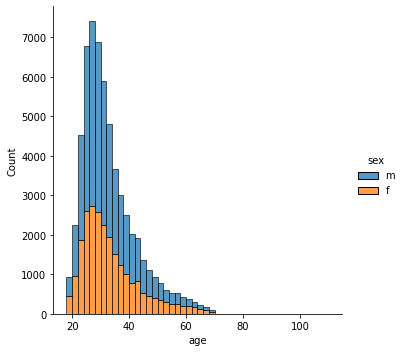

In [25]:
sns.displot(data=df, x='age', hue='sex', kind='hist', binwidth=2, multiple='stack')

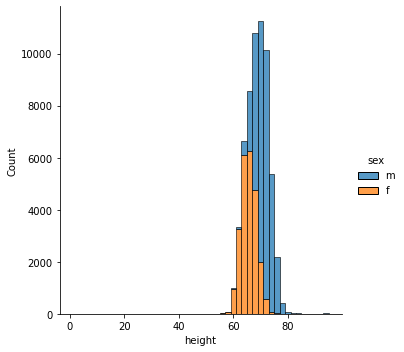

In [26]:
sns.displot(data=df, x='height', hue='sex', kind='hist', binwidth=2, multiple='stack')

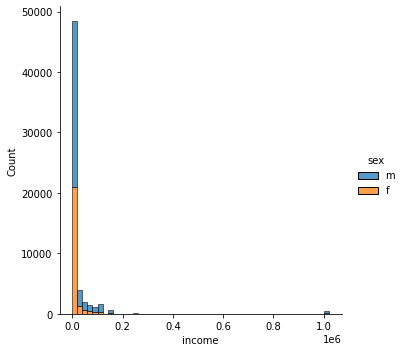

In [53]:
sns.displot(data=df, x="income",hue="sex", kind="hist", binwidth = 20000, multiple = "stack");

<h2> Investigating Discrete Variables </h2>

Body type, diet, drugs, education, ethnicity, job, location, offspring, orientation, pets, religion, sex, sign, smokes, speaks and status are now investigated using count plots.


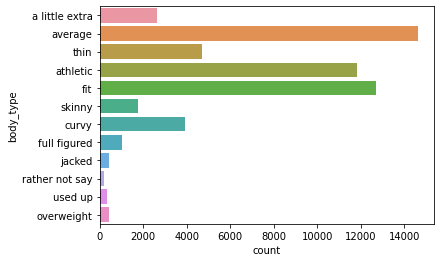

In [28]:
sns.countplot(data=df, y="body_type");

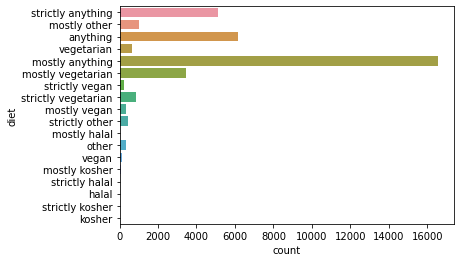

In [29]:
sns.countplot(data=df, y="diet");

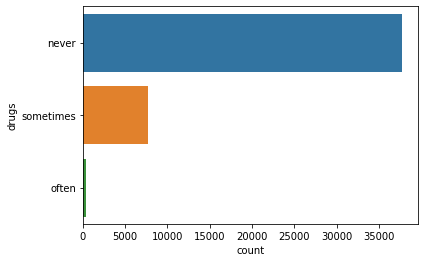

In [30]:
sns.countplot(data=df, y="drugs");

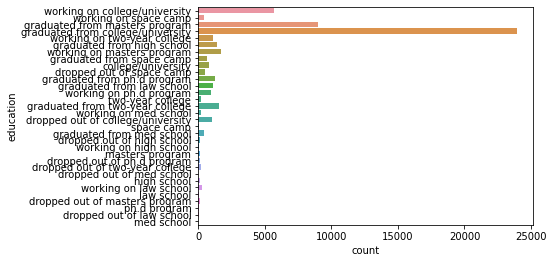

In [31]:
sns.countplot(data=df, y="education");

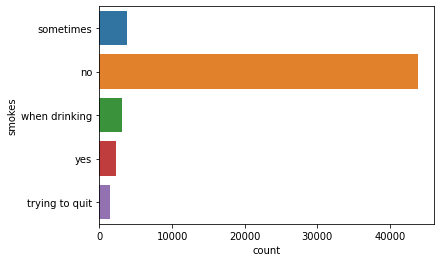

In [32]:
sns.countplot(data=df, y="smokes");

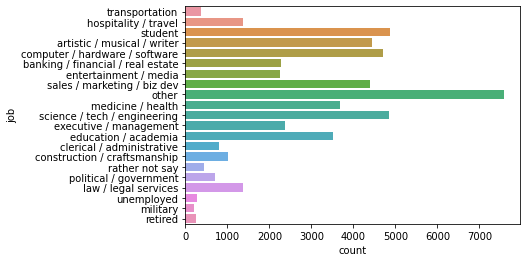

In [33]:
sns.countplot(data=df, y="job");

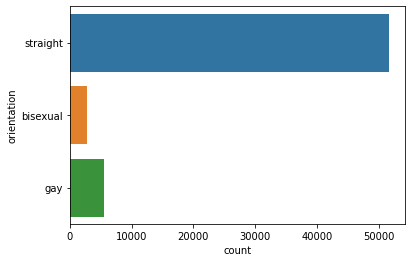

In [34]:
sns.countplot(data=df, y="orientation");

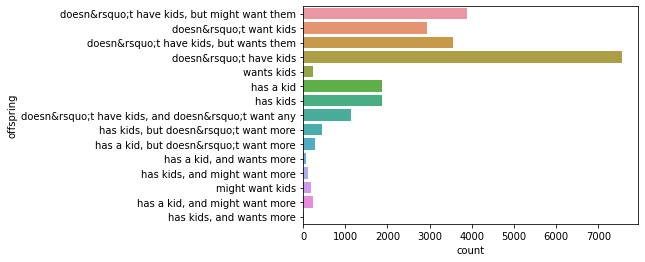

In [35]:
sns.countplot(data=df, y="offspring");

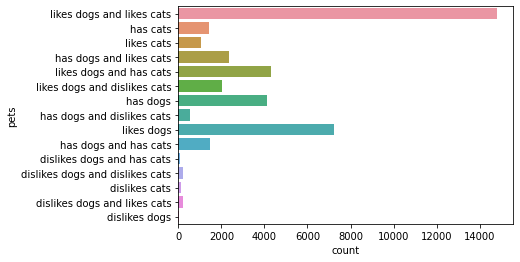

In [36]:
sns.countplot(data=df, y="pets");

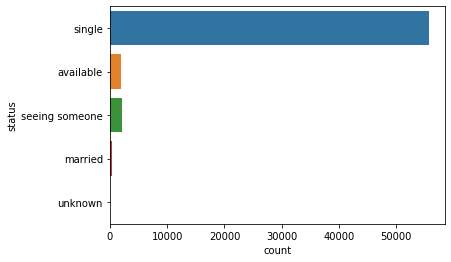

In [37]:
sns.countplot(data=df, y="status");

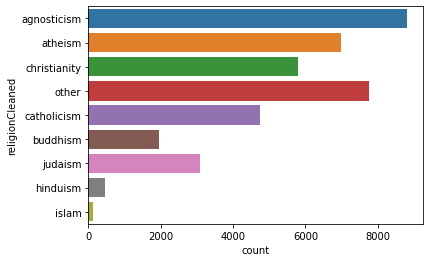

In [38]:
sns.countplot(data=df, y="religionCleaned");

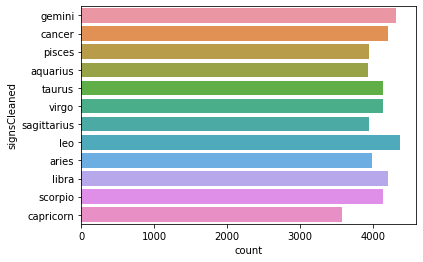

In [39]:
sns.countplot(data=df, y="signsCleaned");

In [40]:
df.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

In [41]:
cols = ['diet', 'drinks', 'drugs', 'smokes','body_type']
df2 = df[cols].dropna()
df2.shape

(25202, 5)

In [42]:
for col in cols[:-1]:
    df2 = pd.get_dummies(df2, columns=[col], prefix = [col])
df2.head()

,body_type,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,...,drinks_socially,drinks_very often,drugs_never,drugs_often,drugs_sometimes,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,a little extra,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,average,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
7,average,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
9,athletic,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
11,average,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [43]:
col_length = len(df2.columns)

#Y is the target column, X has the rest
X = df2.iloc[:, 1:col_length]
Y = df2.iloc[:, 0:1]

#Validation chunk size
val_size = 0.2

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
lr_model = LogisticRegression(multi_class="multinomial", solver='newton-cg')
lr_model.fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00      1047
      athletic       0.28      0.13      0.17      4338
       average       0.28      0.82      0.42      5403
         curvy       0.00      0.00      0.00      1486
           fit       0.29      0.14      0.19      4583
  full figured       0.00      0.00      0.00       369
        jacked       0.25      0.03      0.05       157
    overweight       0.00      0.00      0.00       181
rather not say       0.00      0.00      0.00        66
        skinny       0.33      0.00      0.00       638
          thin       0.23      0.00      0.00      1753
       used up       0.20      0.04      0.06       140

   avg / total       0.24      0.28      0.19     20161



In [47]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [48]:
print(classification_report(Y_train, knn_predictions))

                precision    recall  f1-score   support

a little extra       0.12      0.09      0.10      1047
      athletic       0.24      0.23      0.24      4338
       average       0.29      0.47      0.35      5403
         curvy       0.15      0.04      0.06      1486
           fit       0.26      0.20      0.22      4583
  full figured       0.02      0.10      0.03       369
        jacked       0.44      0.03      0.05       157
    overweight       0.00      0.00      0.00       181
rather not say       0.00      0.00      0.00        66
        skinny       0.13      0.05      0.07       638
          thin       0.37      0.02      0.04      1753
       used up       0.43      0.02      0.04       140

   avg / total       0.25      0.23      0.21     20161



In [49]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [50]:
print(classification_report(Y_train, cart_predictions))

                precision    recall  f1-score   support

a little extra       0.39      0.05      0.08      1047
      athletic       0.28      0.30      0.29      4338
       average       0.30      0.70      0.42      5403
         curvy       0.49      0.03      0.05      1486
           fit       0.33      0.16      0.22      4583
  full figured       0.75      0.02      0.03       369
        jacked       0.83      0.10      0.17       157
    overweight       1.00      0.03      0.05       181
rather not say       1.00      0.05      0.09        66
        skinny       0.65      0.05      0.09       638
          thin       0.52      0.03      0.06      1753
       used up       1.00      0.07      0.13       140

   avg / total       0.38      0.30      0.24     20161

